In [1]:
import os
import numpy as np
import pandas as pd
#caracterísicas de audio y ML. Spicy & audio
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
import librosa
import librosa.display
#import IPython
from IPython.display import Audio
from IPython.display import Image
#import matplotlib.pyplot as plt

In [52]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
def standardize(x): 
    return (x-mean_px)/std_px

In [9]:
#extract_features

In [53]:
#DataFlair - Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel, tonnetz, contrast, tempo):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        #sample_rate, audio = wavfile.read(audioPath)
        if tonnetz:
            stft=np.abs(librosa.stft(X)) #short time fournier transform
            result=np.array([])
        if mfcc:
            mfccs=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
            mfccs_std=np.std(mfccs.T, axis=0)
            mfccs_mean=np.mean(mfccs.T, axis=0)
            result=np.hstack((result, mfccs_mean))
            result=np.hstack((result, mfccs_std))
        if chroma:
            chroma=librosa.feature.chroma_stft(S=stft, sr=sample_rate)
            chroma_mean = np.mean(chroma.T,axis=0)
            chroma_std=np.std(chroma.T,axis=0)
            result=np.hstack((result, chroma_mean))
            result=np.hstack((result, chroma_std))
        if tonnetz:
            y = librosa.effects.harmonic(X)
            tonnetz = librosa.feature.tonnetz(y=y, sr=sample_rate)
            tonnetz_mean = np.mean(tonnetz.T,axis=0)
            tonnetz_std = np.std(tonnetz.T,axis=0)
            result=np.hstack((result, tonnetz_mean))
            result=np.hstack((result, tonnetz_std))
        if contrast:
            contrast = librosa.feature.spectral_contrast(S=stft, sr=sample_rate)
            contrast_mean = np.mean(contrast.T,axis=0)
            contrast_std = np.std(contrast.T,axis=0)
            result=np.hstack((result, contrast_mean))
            result=np.hstack((result, contrast_std))
        if tempo:
            tempo=librosa.feature.tempogram(X, sr=sample_rate)
            tempo_mean=np.mean(tempo.T,axis=0)
            tempo_std=np.std(tempo.T,axis=0)
            result=np.hstack((result, tempo_mean))
            result=np.hstack((result, tempo_std))
        return result

In [11]:
#386 features. Cada una de ellas se hace la media y la std. So de las 193 q se eligen se van pasando.

In [12]:
#emotions

In [54]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised', 
  '09': 'sample' 
}
#DataFlair - Emotions to observe TODO
#observed_emotions=['neutral', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
observed_emotions=['sample', 'surprised']
#observed_emotions=['happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

In [14]:
#load_data and save them in .csv

In [55]:
def load_data_save(test_size=0.25): #parámetro de entrada: tamaño relativo del conjunto de pruebas.
    x,y=[],[]
    for file in glob.glob("C:\\audio_emotions_ddbb\\Emotions\\*\\*.wav"):
        #file_name=os.path.basename(file)
        emotion_path = os.path.dirname(file)
        emotion_code = emotion_path[32:34]
        emotion=emotions[emotion_code]
        print(file)
        
        if emotion not in observed_emotions:
            continue
        
        #!!!!cuidado controlar estado. read about it caracteristicas sonido emocion:
        feature=extract_feature(file, mfcc=False, chroma=False, mel=False, tonnetz=True, contrast=False, tempo=False)
        
        x.append(feature)
        y.append(emotion)
        
    
    return train_test_split(np.array(x), y, test_size=test_size, random_state=23) #primer ejemplo básico
    #return x,y

In [56]:
feeling_list = []
labels = pd.DataFrame(observed_emotions)

In [57]:
labels[:10]

,0
0,sample
1,surprised


In [58]:
x,y=load_data_save()

C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-12.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-13.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-14.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-15.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-16.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-17.wav
C:\audio_emotions_ddbb\Emotions\01\03-01

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bar_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=738
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_base_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=826
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bath_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=792
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bean_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=691
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_beg_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=787
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bite_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=640
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_boat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=712
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=788
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_book_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=678
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bought_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_burn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=681
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_cab_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=723
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_calm_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=852
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_came_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_cause_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=747
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chain_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=746
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chair_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=760
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chalk_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=767
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=704
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_check_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=825
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_cheek_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=772
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chief_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=823
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_choice_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=717
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_cool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=663
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dab_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_date_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=749
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dead_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_death_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=710
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_deep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=810
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dime_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=693
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=876
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_ditch_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=765
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dodge_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=786
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dog_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=838
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_doll_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_door_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=670
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=750
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=701
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_far_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=782
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=757
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fit_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=713
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_five_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=846
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_food_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=807
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gap_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=756
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gas_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=917
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gaze_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=815
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_germ_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=820
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_get_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=740
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gin_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=785
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_goal_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=741
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_good_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=688
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_goose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=812
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gun_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_half_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_hall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=806
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hash_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=735
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hate_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=758
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_have_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=824
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_haze_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=814
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hire_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=795
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hit_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=699
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hole_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=835
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_home_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=707
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hurl_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=702
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_jail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=771
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_jar_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_join_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_judge_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=880
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_jug_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_juice_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=847
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_keen_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=736
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_keep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=811
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_keg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_kick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=799
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_kill_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=853
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_king_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=730
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_kite_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_knock_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_late_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_laud_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=682
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_lean_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=790
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_learn_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_lease_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=789
  warnings.warn(
C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=829
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_lid_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_life_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=854
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_limb_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=724
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_live_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=769
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_loaf_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=784
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_long_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_lore_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_lose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=914
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_lot_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=752
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_love_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=739
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_luck_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=841
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_make_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=793
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_match_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_merge_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=770
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_mess_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=800
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_met_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=844
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_mill_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mob_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mode_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mood_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_moon_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=816
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_mop_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mouse_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=803
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_nag_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=819
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_name_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_near_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=845
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_neat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=797
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_nice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_note_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=779
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_numb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pad_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_page_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=818
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pain_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pass_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=877
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pearl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_peg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_perch_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=905
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_phone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=743
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=695
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pike_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pole_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=802
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_puff_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=763
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_raid_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_rain_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=732
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_raise_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_rat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=703
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_reach_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=833
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_read_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_red_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_ring_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=719
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_ripe_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_road_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_room_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=696
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=831
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rot_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=694
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rough_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=849
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_said_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=834
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_search_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=875
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_seize_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sell_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=726
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shack_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=721
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=837
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shawl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sheep_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_shirt_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_should_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=783
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shout_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=801
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_size_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_soap_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=737
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_soup_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=856
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_sour_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_south_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sub_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_such_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=861
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_sure_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_take_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_talk_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tape_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=827
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_team_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tell_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_thin_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_third_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=762
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_thought_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=677
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_thumb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_time_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=830
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_tip_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tire_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=868
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_ton_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tool_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tough_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_turn_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_vine_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=714
  warnings.warn(
C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=754
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_voice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_void_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=938
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_vote_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=894
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_wag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_walk_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=872
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_wash_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=893
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_week_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=711
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_wheat_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_when_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_which_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_whip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=641
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_white_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_wife_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_wire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_witch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_yearn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=808
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_yes_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_young_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=706
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_youth_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_back_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bar_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=683
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_base_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=759
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_bath_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bean_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_beg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bite_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_boat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=832
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_bone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=716
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_book_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bought_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_burn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=843
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_cab_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_calm_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=650
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_came_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_cause_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_chain_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=720
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_chair_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_chalk_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=874
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_chat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=733
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_check_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=744
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_cheek_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_chief_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_choice_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=923
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_cool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=715
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_dab_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_date_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dead_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_death_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_deep_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dime_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=891
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_dip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=748
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_ditch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dodge_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dog_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=700
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_doll_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_door_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=937
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_fail_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_fall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=881
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_far_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=718
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_fat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=898
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_fit_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_five_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=731
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_food_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=698
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_gap_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gas_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gaze_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_germ_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_get_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gin_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_goal_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=676
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_good_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_goose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=871
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_gun_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_half_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=672
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_hash_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=906
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_hate_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_have_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_haze_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hit_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hole_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=657
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_home_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hurl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_jail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=911
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_jar_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_join_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_judge_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_jug_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=725
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_juice_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=775
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_keen_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=887
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_keep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=729
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_keg_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=680
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_kick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=753
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_kill_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=686
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_king_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=886
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_kite_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=869
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_knock_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_late_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_laud_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=890
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_lean_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_learn_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lease_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lid_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=653
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_life_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_limb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_live_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_loaf_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_long_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lore_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=674
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_lose_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lot_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=857
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_love_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=901
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_luck_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_make_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_match_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_merge_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_mess_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=727
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_met_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=822
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mill_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=642
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mob_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=708
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mode_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_mood_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=697
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_moon_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=883
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mop_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=728
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mouse_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_nag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_name_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=648
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_near_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_neat_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_nice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_note_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=692
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_numb_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=630
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pad_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_page_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pain_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_pass_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_pearl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_peg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_perch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_phone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=652
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=689
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pike_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_pole_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=634
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=791
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_puff_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_raid_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=766
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_rain_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_raise_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=685
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_reach_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_read_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=656
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_red_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_ring_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=669
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_ripe_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_road_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=668
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_room_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rose_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rot_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rough_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_said_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_sail_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_search_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_seize_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sell_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shack_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shall_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shawl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sheep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=734
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_shirt_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=774
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_should_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shout_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_size_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=935
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_soap_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_soup_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sour_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_south_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sub_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_such_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sure_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_take_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_talk_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_tape_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_team_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_tell_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_thin_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_third_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_thought_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_thumb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_time_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=745
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_tip_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_tire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_ton_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=684
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_tool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=655
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_tough_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_turn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=667
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_vine_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_voice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_void_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_vote_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_wag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_walk_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_wash_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_week_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=900
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_wheat_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_when_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_which_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=879
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_whip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=778
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_white_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_wife_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=742
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_wire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_witch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_yearn_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_yes_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_young_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_youth_ps.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-01.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions

ValueError: too many values to unpack (expected 2)

In [60]:
df = pd.DataFrame(columns=['feature'])
def load_data_save(test_size=0.25): #parámetro de entrada: tamaño relativo del conjunto de pruebas.
    x,y=[],[]
    bookmark=0
    for file in glob.glob("C:\\audio_emotions_ddbb\\Emotions\\*\\*.wav"):
        #file_name=os.path.basename(file)
        emotion_path = os.path.dirname(file)
        emotion_code = emotion_path[32:34]
        emotion=emotions[emotion_code]
        print(file)
        
        if emotion not in observed_emotions:
            continue
        
        #!!!!cuidado controlar estado. read about it caracteristicas sonido emocion:
        feature=extract_feature(file, mfcc=False, chroma=False, mel=False, tonnetz=True, contrast=False, tempo=False)
        
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1 
        
        x.append(feature)
        y.append(emotion)
        
    
    #return train_test_split(np.array(x), y, test_size=test_size, random_state=23) #primer ejemplo básico
    return x,y

In [61]:
x,y=load_data_save()

C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-12.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-13.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-14.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-15.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-16.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-17.wav
C:\audio_emotions_ddbb\Emotions\01\03-01

In [62]:
labels = pd.DataFrame(y)

In [63]:
labels

,0
0,surprised
1,surprised
2,surprised
3,surprised
4,surprised
...,...
602,sample
603,sample
604,sample
605,sample


In [64]:
df[:5]

,feature
0,"[-0.01599279423097813, 0.010468424181620773, 0..."
1,"[-0.024990145543476994, 0.017129124746070385, ..."
2,"[-0.00023004481537098215, -0.02661931017465959..."
3,"[-0.033930246164031924, 0.024658582486847238, ..."
4,"[-0.07494662545660931, -0.012767457618966702, ..."


In [65]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [66]:
newdf = pd.concat([df3,labels], axis=1)

In [68]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [69]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,10,11,0
0,-0.015993,0.010468,0.001840,-0.007716,0.005765,0.006613,0.051894,0.043307,0.089350,0.071680,0.025521,0.019860,surprised
1,-0.024990,0.017129,-0.055409,0.012741,0.027518,0.002413,0.054119,0.102140,0.110072,0.141259,0.038409,0.056555,surprised
2,-0.000230,-0.026619,-0.044317,0.024269,0.009293,0.003226,0.061683,0.056210,0.136225,0.094322,0.044643,0.032749,surprised
3,-0.033930,0.024659,0.017833,0.030759,-0.012439,0.010463,0.084092,0.050264,0.116389,0.085978,0.034120,0.036213,surprised
4,-0.074947,-0.012767,-0.001049,-0.004957,0.005404,0.017325,0.061128,0.050795,0.109648,0.077975,0.031369,0.050953,surprised


In [70]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,0
431,0.040045,0.016484,0.073068,-0.065993,0.019581,-0.008693,0.097419,0.108489,0.167065,0.173813,0.055754,0.062048,surprised
295,0.049735,-0.029191,-0.081676,0.053436,-0.001993,0.000924,0.116947,0.142008,0.212467,0.290680,0.087909,0.093220,surprised
395,-0.017328,0.066240,-0.043852,0.026648,0.012315,-0.014780,0.180815,0.154152,0.196202,0.291018,0.100409,0.077241,surprised
375,0.024917,0.065040,-0.077886,0.025278,0.007384,-0.022397,0.160258,0.171026,0.309316,0.217062,0.118843,0.068627,surprised
418,0.013054,-0.016056,-0.095024,0.038538,0.005752,0.020543,0.178976,0.076400,0.189085,0.227585,0.065020,0.077654,surprised
372,0.025091,0.033433,0.045166,-0.116050,0.027817,0.024701,0.117096,0.168063,0.247195,0.176004,0.085844,0.076760,surprised
53,-0.051046,0.023875,-0.030755,-0.004687,-0.001227,-0.007299,0.089659,0.058105,0.116886,0.116563,0.040728,0.041134,surprised
363,-0.027200,0.049234,-0.080498,-0.001288,-0.026365,0.010021,0.108091,0.122902,0.225299,0.195586,0.073908,0.067440,surprised
469,-0.015314,-0.031840,0.023761,-0.018279,-0.013872,-0.001204,0.106372,0.133717,0.198612,0.194367,0.078384,0.060444,surprised
8,-0.030283,0.015590,-0.053399,-0.029388,0.003535,0.013407,0.053418,0.075537,0.087608,0.114174,0.030592,0.034254,surprised


In [71]:
rnewdf=rnewdf.fillna(0)

In [ ]:
#split

In [72]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [73]:
train[250:260]

,0,1,2,3,4,5,6,7,8,9,10,11,0
429,0.014528,0.013525,-0.109635,0.059518,0.017647,0.009809,0.155641,0.121894,0.212942,0.217671,0.067940,0.081223,surprised
564,-0.029393,-0.026136,-0.084385,0.004023,-0.004820,0.020505,0.114380,0.118867,0.137438,0.201531,0.070046,0.051144,surprised
408,-0.025950,-0.017912,-0.054712,-0.017027,0.004403,-0.005389,0.127620,0.088647,0.153240,0.215549,0.064304,0.062570,surprised
105,-0.108660,0.053779,0.062724,-0.096790,-0.004885,0.030165,0.073946,0.063706,0.158652,0.108459,0.045321,0.067027,surprised
537,-0.005144,-0.012793,-0.008682,0.000161,-0.013482,-0.013052,0.092233,0.104827,0.172461,0.173577,0.058916,0.056445,surprised
389,-0.020400,0.024380,0.042073,-0.009207,0.008423,-0.014729,0.133829,0.129594,0.236848,0.232691,0.091239,0.072625,surprised
17,-0.021359,0.011041,0.027472,0.006570,0.008793,-0.011374,0.059301,0.077007,0.102913,0.115966,0.036384,0.037026,surprised
44,-0.020162,0.018931,-0.039511,-0.005088,0.011715,-0.013601,0.062267,0.044460,0.072385,0.053564,0.023074,0.026124,surprised
254,0.015371,-0.026242,0.014884,0.010509,-0.001955,0.029131,0.131889,0.133158,0.203058,0.166895,0.033222,0.091110,surprised
100,-0.044423,0.033546,-0.021919,-0.007379,0.007409,-0.000483,0.066923,0.066574,0.132157,0.117902,0.048491,0.039128,surprised


In [74]:
trainfeatures = train.iloc[:, :-1]

In [75]:
trainlabel = train.iloc[:, -1:]

In [76]:
testfeatures = test.iloc[:, :-1]

In [77]:
testlabel = test.iloc[:, -1:]

In [79]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [80]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [81]:
X_train.shape

(476, 12)

In [82]:
#changing dimension for CNN model
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [86]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

In [108]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same', input_shape=(12,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(2))
model.add(Activation('softmax'))
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)

In [109]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_29 (Conv1D)           (None, 12, 256)           1536      
_________________________________________________________________
activation_35 (Activation)   (None, 12, 256)           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 12, 128)           163968    
_________________________________________________________________
activation_36 (Activation)   (None, 12, 128)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 128)           0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 1, 128)            0         
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 1, 128)          

In [110]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [111]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700, validation_data=(x_testcnn, y_test))

Epoch 1/700
30/30 [==============================] - 0s 14ms/step - loss: 0.6911 - accuracy: 0.8845 - val_loss: 0.6889 - val_accuracy: 0.9771
Epoch 2/700
30/30 [==============================] - 0s 7ms/step - loss: 0.6870 - accuracy: 0.9727 - val_loss: 0.6852 - val_accuracy: 0.9771
Epoch 3/700
30/30 [==============================] - 0s 7ms/step - loss: 0.6830 - accuracy: 0.9727 - val_loss: 0.6812 - val_accuracy: 0.9771
Epoch 4/700
30/30 [==============================] - 0s 7ms/step - loss: 0.6787 - accuracy: 0.9727 - val_loss: 0.6769 - val_accuracy: 0.9771
Epoch 5/700
30/30 [==============================] - 0s 7ms/step - loss: 0.6740 - accuracy: 0.9727 - val_loss: 0.6721 - val_accuracy: 0.9771
Epoch 6/700
30/30 [==============================] - 0s 7ms/step - loss: 0.6689 - accuracy: 0.9727 - val_loss: 0.6669 - val_accuracy: 0.9771
Epoch 7/700
30/30 [==============================] - 0s 7ms/step - loss: 0.6632 - accuracy: 0.9727 - val_loss: 0.6612 - val_accuracy: 0.9771
Epoch 8/700


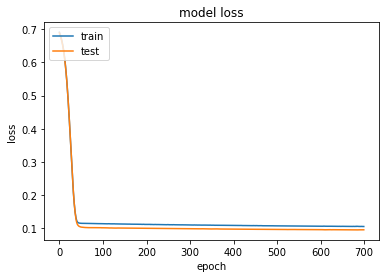

In [112]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [116]:
 # evaluate loaded model on test data
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 97.71%


In [118]:

preds = model.predict(x_testcnn, 
                         batch_size=32, 
                         verbose=1)

5/5 [==============================] - 0s 2ms/step


In [119]:
preds

array([[0.00321173, 0.99678826],
       [0.0054967 , 0.9945034 ],
       [0.06032036, 0.93967956],
       [0.01000655, 0.9899934 ],
       [0.08117221, 0.9188278 ],
       [0.00488093, 0.9951191 ],
       [0.00754434, 0.9924556 ],
       [0.01404066, 0.98595935],
       [0.07896012, 0.9210398 ],
       [0.0123054 , 0.9876946 ],
       [0.0142125 , 0.9857875 ],
       [0.01581579, 0.98418415],
       [0.00845539, 0.9915446 ],
       [0.0241882 , 0.9758118 ],
       [0.08571474, 0.9142853 ],
       [0.08157583, 0.9184242 ],
       [0.0682727 , 0.9317273 ],
       [0.01047418, 0.9895258 ],
       [0.05002907, 0.9499709 ],
       [0.0216964 , 0.9783036 ],
       [0.02600059, 0.97399944],
       [0.00956935, 0.99043065],
       [0.09500514, 0.90499485],
       [0.06761278, 0.93238723],
       [0.04463308, 0.9553669 ],
       [0.00997374, 0.99002624],
       [0.0603652 , 0.93963474],
       [0.01303048, 0.9869695 ],
       [0.01292651, 0.9870734 ],
       [0.01510165, 0.9848984 ],
       [0.

In [120]:
preds1=preds.argmax(axis=1)

In [121]:
preds1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [122]:
abc = preds1.astype(int).flatten()

In [123]:
predictions = (lb.inverse_transform((abc)))

In [124]:
preddf = pd.DataFrame({'predictedvalues': predictions})
preddf[:10]

,predictedvalues
0,surprised
1,surprised
2,surprised
3,surprised
4,surprised
5,surprised
6,surprised
7,surprised
8,surprised
9,surprised


In [125]:
actual=y_test.argmax(axis=1)
abc123 = actual.astype(int).flatten()
actualvalues = (lb.inverse_transform((abc123)))

In [126]:
actualdf = pd.DataFrame({'actualvalues': actualvalues})
actualdf[:10]

,actualvalues
0,surprised
1,surprised
2,surprised
3,surprised
4,surprised
5,surprised
6,surprised
7,surprised
8,surprised
9,surprised


In [127]:
finaldf = actualdf.join(preddf)

In [129]:
finaldf

,actualvalues,predictedvalues
0,surprised,surprised
1,surprised,surprised
2,surprised,surprised
3,surprised,surprised
4,surprised,surprised
...,...,...
126,surprised,surprised
127,surprised,surprised
128,surprised,surprised
129,surprised,surprised


In [130]:
finaldf.groupby('actualvalues').count()

,predictedvalues
actualvalues,
sample,3
surprised,128


In [132]:
finaldf.groupby('predictedvalues').count()

,actualvalues
predictedvalues,
surprised,131


In [99]:
x_traincnn

array([[[ 0.0400453 ],
        [ 0.01648435],
        [ 0.07306752],
        ...,
        [ 0.17381274],
        [ 0.05575436],
        [ 0.06204755]],

       [[ 0.04973472],
        [-0.02919139],
        [-0.0816758 ],
        ...,
        [ 0.29067992],
        [ 0.08790905],
        [ 0.09321983]],

       [[ 0.02491679],
        [ 0.06503957],
        [-0.07788611],
        ...,
        [ 0.21706219],
        [ 0.11884349],
        [ 0.06862724]],

       ...,

       [[-0.02093703],
        [ 0.00222785],
        [ 0.01733568],
        ...,
        [ 0.07330881],
        [ 0.02501503],
        [ 0.02768482]],

       [[ 0.02878515],
        [-0.00630185],
        [-0.05738398],
        ...,
        [ 0.18181534],
        [ 0.05000504],
        [ 0.07897803]],

       [[-0.00578663],
        [ 0.00438823],
        [-0.13300576],
        ...,
        [ 0.20662598],
        [ 0.06948617],
        [ 0.07441902]]])

In [16]:
#event

In [17]:
#Model definition

## Model sin MEL

In [26]:
x_train,x_test,y_train,y_test=load_data_save(test_size=0.25)

C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-12.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-13.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-14.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-15.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-16.wav
C:\audio_emotions_ddbb\Emotions\01\03-01-01-01-01-01-17.wav
C:\audio_emotions_ddbb\Emotions\01\03-01

C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=776
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bar_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=738
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_base_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=826
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bath_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=792
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bean_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=691
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_beg_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=787
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bite_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=640
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_boat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=712
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=788
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_book_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=678
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_bought_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_burn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=681
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_cab_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_calm_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=723
  warnings.warn(
C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=852
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_came_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_cause_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=747
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chain_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=746
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chair_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=760
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chalk_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=767
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=704
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_check_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=825
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_cheek_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=772
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_chief_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=823
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_choice_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=717
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_cool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=663
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dab_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_date_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=749
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dead_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_death_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=710
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_deep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=810
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dime_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=693
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=876
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_ditch_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=765
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dodge_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=786
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_dog_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=838
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_doll_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_door_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=670
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=750
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=701
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_far_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=782
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=757
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_fit_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=713
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_five_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=846
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_food_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=807
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gap_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=756
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gas_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=917
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gaze_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=815
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_germ_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=820
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_get_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=740
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gin_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=785
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_goal_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=741
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_good_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=688
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_goose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=812
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_gun_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_half_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_hall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=806
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hash_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=735
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hate_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=758
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_have_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=824
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_haze_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=814
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hire_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=795
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hit_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=699
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hole_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=835
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_home_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=707
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hurl_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=702
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_hush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_jail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=771
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_jar_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_join_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_judge_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=880
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_jug_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_juice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_keen_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=847
  warnings.warn(
C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=736
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_keep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=811
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_keg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_kick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=799
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_kill_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=853
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_king_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=730
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_kite_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_knock_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_late_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_laud_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=682
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_lean_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=790
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_learn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=789
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_lease_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=829
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_lid_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_life_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=854
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_limb_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=724
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_live_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=769
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_loaf_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=784
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_long_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_lore_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_lose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=914
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_lot_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=752
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_love_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=739
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_luck_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=841
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_make_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=793
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_match_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_merge_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=770
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_mess_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=800
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_met_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=844
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_mill_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mob_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mode_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mood_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_moon_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=816
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_mop_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_mouse_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=803
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_nag_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=819
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_name_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_near_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=845
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_neat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=797
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_nice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_note_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=779
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_numb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pad_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_page_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=818
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pain_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pass_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=877
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pearl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_peg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_perch_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=905
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_phone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=743
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=695
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_pike_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pole_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_pool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=802
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_puff_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=763
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_raid_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_rain_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=732
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_raise_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_rat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=703
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_reach_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=833
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_read_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_red_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_ring_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=719
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_ripe_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_road_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_room_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=696
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=831
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rot_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=694
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rough_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=849
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_rush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_said_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=834
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_search_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=875
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_seize_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sell_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=726
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shack_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=721
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=837
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shawl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sheep_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_shirt_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_should_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=783
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_shout_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=801
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_size_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_soap_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=737
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_soup_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=856
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_sour_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_south_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_sub_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_such_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=861
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_sure_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_take_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_talk_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tape_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=827
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_team_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tell_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_thin_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_third_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=762
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_thought_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=677
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_thumb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_time_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=830
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_tip_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tire_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=868
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_ton_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tool_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_tough_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_turn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=714
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_vine_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=754
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_voice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_void_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=938
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_vote_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=894
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_wag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_walk_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=872
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_wash_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=893
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_week_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=711
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_wheat_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_when_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_which_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_whip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=641
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_white_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_wife_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_wire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_witch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_yearn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=808
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_yes_ps.wav
C:\audio_emotions_ddbb\Emotions\08\OAF_young_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=706
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\OAF_youth_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_back_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bar_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=683
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_base_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=759
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_bath_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bean_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_beg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bite_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_boat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=832
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_bone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=716
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_book_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_bought_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_burn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=843
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_cab_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_calm_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=650
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_came_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_cause_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_chain_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=720
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_chair_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_chalk_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=874
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_chat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=733
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_check_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=744
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_cheek_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_chief_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_choice_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=923
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_cool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=715
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_dab_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_date_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dead_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_death_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_deep_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dime_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=891
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_dip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=748
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_ditch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dodge_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_dog_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=700
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_doll_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_door_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=937
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_fail_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_fall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=881
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_far_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=718
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_fat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=898
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_fit_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_five_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=731
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_food_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=698
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_gap_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gas_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gaze_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_germ_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_get_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_gin_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_goal_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=676
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_good_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_goose_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=871
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_gun_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_half_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hall_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=672
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_hash_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=906
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_hate_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_have_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_haze_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hit_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hole_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=657
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_home_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hurl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_hush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_jail_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=911
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_jar_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_join_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_judge_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_jug_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=725
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_juice_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=775
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_keen_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=887
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_keep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=729
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_keg_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=680
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_kick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=753
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_kill_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=686
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_king_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=886
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_kite_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=869
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_knock_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_late_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_laud_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=890
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_lean_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_learn_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lease_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lid_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=653
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_life_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_limb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_live_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_loaf_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_long_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lore_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=674
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_lose_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_lot_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=857
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_love_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=901
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_luck_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_make_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_match_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_merge_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_mess_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=727
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_met_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=822
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mill_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=642
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mob_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=708
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mode_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_mood_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=697
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_moon_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=883
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mop_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=728
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_mouse_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_nag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_name_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=648
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_near_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_neat_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_nice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_note_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=692
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_numb_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=630
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pad_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_page_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=862
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pain_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_pass_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_pearl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_peg_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_perch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_phone_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=652
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pick_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=689
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pike_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_pole_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=634
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_pool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=791
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_puff_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_raid_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=766
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_rain_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_raise_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rat_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=685
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_reach_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_read_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=656
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_red_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_ring_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=669
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_ripe_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_road_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=668
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_room_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rose_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rot_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rough_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_rush_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_said_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_sail_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_search_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_seize_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sell_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shack_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shall_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shawl_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sheep_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=734
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_shirt_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=774
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_should_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_shout_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_size_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=935
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_soap_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_soup_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sour_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_south_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sub_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_such_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_sure_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_take_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_talk_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_tape_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_team_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_tell_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_thin_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_third_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_thought_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_thumb_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_time_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=745
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_tip_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_tire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_ton_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=684
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_tool_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=655
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_tough_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_turn_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=667
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_vine_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_voice_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_void_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_vote_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_wag_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_walk_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_wash_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_week_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=900
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_wheat_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_when_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_which_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=879
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_whip_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=778
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_white_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_wife_ps.wav


C:\Users\amand\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=742
  warnings.warn(


C:\audio_emotions_ddbb\Emotions\08\YAF_wire_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_witch_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_yearn_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_yes_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_young_ps.wav
C:\audio_emotions_ddbb\Emotions\08\YAF_youth_ps.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-01.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-02.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-03.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-04.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-05.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-06.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-07.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-08.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-09.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-10.wav
C:\audio_emotions_ddbb\Emotions\09\03-01-08-01-01-01-11.wav
C:\audio_emotions_ddbb\Emotions

In [ ]:
x_train()

In [12]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 12


In [74]:
x_train[0]

array([ 1.16800171e+02,  6.02849045e+01,  4.41550140e+01,  3.46338081e+01,
        3.20375519e+01,  2.16065369e+01,  2.53544350e+01,  1.88572006e+01,
        1.41589270e+01,  1.19319181e+01,  1.67439766e+01,  1.58820801e+01,
        1.44562902e+01,  8.65260124e+00,  1.16346188e+01,  1.05067835e+01,
        1.24848747e+01,  1.58761292e+01,  1.90237255e+01,  2.10643387e+01,
        7.97172928e+00,  1.68446617e+01,  2.11354218e+01,  2.39628201e+01,
        1.73366852e+01,  1.06859989e+01,  1.54433079e+01,  1.95275669e+01,
        1.68711433e+01,  1.68645687e+01,  1.81500244e+01,  1.92070332e+01,
        2.31702309e+01,  1.77303505e+01,  1.61621170e+01,  1.18844595e+01,
        9.47531223e+00,  1.23309431e+01,  9.70010185e+00,  8.41237259e+00,
        1.16800171e+02,  6.02849045e+01,  4.41550140e+01,  3.46338081e+01,
        3.20375519e+01,  2.16065369e+01,  2.53544350e+01,  1.88572006e+01,
        1.41589270e+01,  1.19319181e+01,  1.67439766e+01,  1.58820801e+01,
        1.44562902e+01,  

## Por ahora el mejor resultado se ha obtenido con modelOldParams y modelBestParams para 700 iteraciones (1000 mucho peor)

# MLP Classifier

In [107]:
#700 lo mejor:
modelBestParams = MLPClassifier(alpha=0.1, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(50, 100, 50), learning_rate='constant', max_iter=700, solver='adam', activation='relu')

In [47]:
#modelBestParams = MLPClassifier(alpha=0.1, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(50, 100, 50), learning_rate='constant', max_iter=500, solver='adam', activation='relu')
modelBestParams = MLPClassifier(alpha=0.1, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(50, 100, 50), learning_rate='constant', max_iter=750, solver='adam', activation='relu')

In [68]:
modelOldParams = MLPClassifier(alpha=0.1, batch_size=250, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=700, solver='adam', activation='relu')

In [108]:
modelBestParams = modelBestParams.fit(x_train, y_train)

In [22]:
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.8017717561229807

In [39]:
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.8522146951537259

In [49]:
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.8762897342365815

In [39]:
#sin tempo con chroma
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.8369984366857739

In [50]:
#aleatorio
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.8169880145909327

In [64]:
#con más registros
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.6846928499496475

In [14]:
#Sin neutral
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.7392727272727273

In [109]:
#Desviación
score_bp = modelBestParams.score(x_train,y_train)
score_bp

0.6326211568525274

In [65]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

In [66]:
#sin tempo con chroma
y_true, y_pred = y_test , modelBestParams.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

       angry       0.72      0.72      0.72       567
     disgust       0.74      0.36      0.49       505
     fearful       0.67      0.44      0.53       533
       happy       0.52      0.62      0.56       515
     neutral       0.50      0.79      0.62       459
         sad       0.65      0.73      0.68       579
   surprised       0.77      0.86      0.81       153

    accuracy                           0.62      3311
   macro avg       0.65      0.64      0.63      3311
weighted avg       0.64      0.62      0.61      3311



In [23]:
y_true, y_pred = y_test , modelBestParams.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

       angry       0.76      0.78      0.77       525
     disgust       0.67      0.49      0.56       514
     fearful       0.70      0.59      0.64       522
       happy       0.58      0.62      0.60       522
     neutral       0.58      0.70      0.63       429
         sad       0.64      0.71      0.67       528
   surprised       0.84      0.89      0.86       159

    accuracy                           0.66      3199
   macro avg       0.68      0.69      0.68      3199
weighted avg       0.67      0.66      0.66      3199



In [51]:
y_true, y_pred = y_test , modelBestParams.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

       angry       0.70      0.71      0.71       525
     disgust       0.53      0.50      0.52       514
     fearful       0.56      0.54      0.55       522
       happy       0.54      0.53      0.54       522
     neutral       0.56      0.67      0.61       429
         sad       0.60      0.57      0.58       528
   surprised       0.84      0.81      0.83       159

    accuracy                           0.60      3199
   macro avg       0.62      0.62      0.62      3199
weighted avg       0.60      0.60      0.59      3199



In [50]:
y_true, y_pred = y_test , modelBestParams.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

       angry       0.76      0.81      0.78       525
     disgust       0.61      0.59      0.60       514
     fearful       0.69      0.66      0.67       522
       happy       0.70      0.57      0.63       522
     neutral       0.57      0.75      0.65       429
         sad       0.67      0.65      0.66       528
   surprised       0.98      0.84      0.90       159

    accuracy                           0.68      3199
   macro avg       0.71      0.70      0.70      3199
weighted avg       0.69      0.68      0.68      3199



In [15]:
#Sin neutral
y_true, y_pred = y_test , modelBestParams.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

       angry       0.74      0.77      0.76       513
     disgust       0.67      0.54      0.59       498
     fearful       0.68      0.55      0.61       492
       happy       0.61      0.70      0.65       546
         sad       0.66      0.74      0.70       538
   surprised       0.79      0.92      0.85       163

    accuracy                           0.68      2750
   macro avg       0.69      0.70      0.69      2750
weighted avg       0.68      0.68      0.67      2750



In [110]:
#Sin neutral
y_true, y_pred = y_test , modelBestParams.predict(x_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

       angry       0.74      0.67      0.70       518
     disgust       0.50      0.47      0.48       476
     fearful       0.48      0.58      0.52       486
       happy       0.57      0.44      0.49       543
     neutral       0.61      0.46      0.52       481
         sad       0.51      0.74      0.61       542
   surprised       0.85      0.69      0.76       153

    accuracy                           0.57      3199
   macro avg       0.61      0.58      0.58      3199
weighted avg       0.58      0.57      0.57      3199



In [16]:
#Sin neutral
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 67.71%


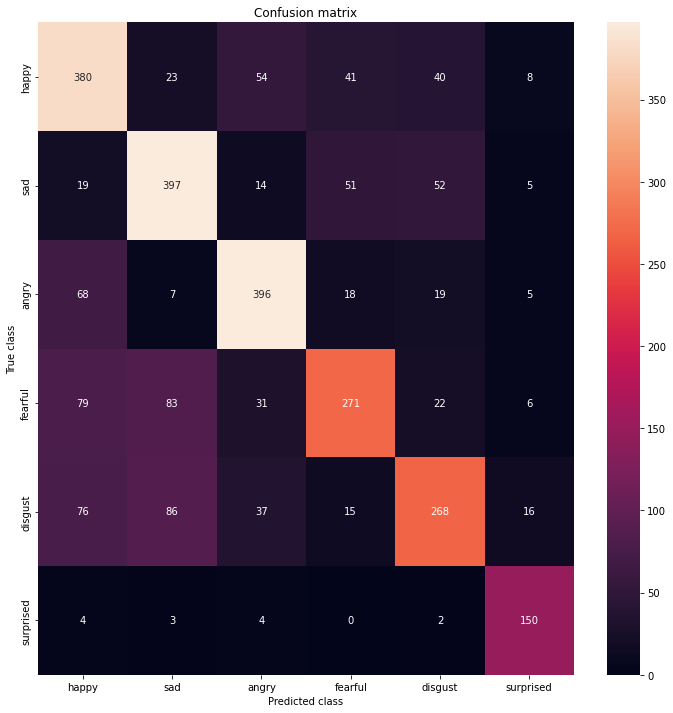

              precision    recall  f1-score   support

       angry       0.74      0.77      0.76       513
     disgust       0.67      0.54      0.59       498
     fearful       0.68      0.55      0.61       492
       happy       0.61      0.70      0.65       546
         sad       0.66      0.74      0.70       538
   surprised       0.79      0.92      0.85       163

    accuracy                           0.68      2750
   macro avg       0.69      0.70      0.69      2750
weighted avg       0.68      0.68      0.67      2750



In [19]:
#Sin neutral
mostrar_resultados(y_test, y_pred)

In [41]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.99%


In [14]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.83%


In [24]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 66.18%


In [41]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.83%


In [52]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 59.55%


In [67]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 62.07%


In [18]:
#confusion matrix
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y,labels=observed_emotions)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=observed_emotions, yticklabels=observed_emotions, annot=True, fmt="d");
    #sns.heatmap(conf_matrix);
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y))

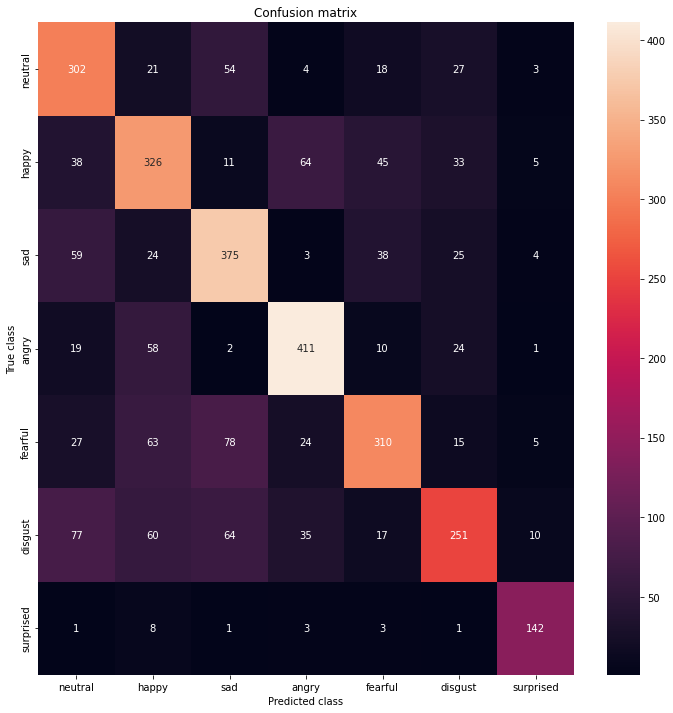

              precision    recall  f1-score   support

       angry       0.76      0.78      0.77       525
     disgust       0.67      0.49      0.56       514
     fearful       0.70      0.59      0.64       522
       happy       0.58      0.62      0.60       522
     neutral       0.58      0.70      0.63       429
         sad       0.64      0.71      0.67       528
   surprised       0.84      0.89      0.86       159

    accuracy                           0.66      3199
   macro avg       0.68      0.69      0.68      3199
weighted avg       0.67      0.66      0.66      3199



In [27]:
mostrar_resultados(y_test, y_pred)

In [70]:
modelOldParams = modelOldParams.fit(x_train, y_train)

In [71]:
#más base de datos
score_op = modelBestParams.score(x_train,y_train)
score_op

0.6846928499496475

In [25]:
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8185513288170922

In [54]:
#700 iteraciones
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8762897342365815

In [60]:
#700 iteraciones
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8762897342365815

In [30]:
#700 iteraciones
score_op = modelBestParams.score(x_train,y_train)
score_op

0.8017717561229807

In [72]:
y_true, y_pred_op = y_test , modelOldParams.predict(x_test)

In [56]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_op)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 68.15%


In [33]:
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_op)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 65.65%


In [73]:
y_true, y_pred_op = y_test , modelOldParams.predict(x_test)
#Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred_op)
#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 60.10%


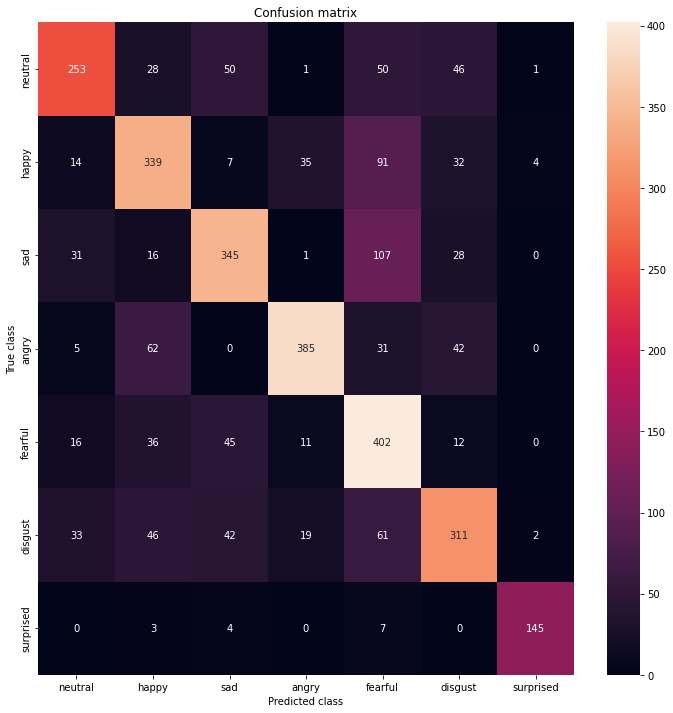

              precision    recall  f1-score   support

       angry       0.85      0.73      0.79       525
     disgust       0.66      0.61      0.63       514
     fearful       0.54      0.77      0.63       522
       happy       0.64      0.65      0.64       522
     neutral       0.72      0.59      0.65       429
         sad       0.70      0.65      0.68       528
   surprised       0.95      0.91      0.93       159

    accuracy                           0.68      3199
   macro avg       0.72      0.70      0.71      3199
weighted avg       0.70      0.68      0.68      3199



In [57]:
mostrar_resultados(y_test, y_pred_op)

In [ ]:
mostrar_resultados(y_test, y_pred_op)

In [ ]:
## Tecnica validación cruzada, para el overfitting

In [ ]:
#TODOOOO: ESTO DE ANTES ES ACCURACY, AHORA HABRÍA QUE CALCULAR EL UAR

## Red Neuronal

In [1]:
conda update anaconda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - anaconda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py38haa95532_0         152 KB
    ipywidgets-7.6.5           |     pyhd3eb1b0_1         105 KB
    nltk-3.6.5                 |     pyhd3eb1b0_0         979 KB
    numpy-1.21.2               |   py38hfca59bb_0          24 KB
    numpy-base-1.21.2          |   py38h0829f74_0         4.4 MB
    ------------------------------------------------------------
                                           Total:         5.6 MB

The following packages will be UPDATED:

  certifi                          2021.5.30-py38haa95532_0 --> 2021.10.8-py38haa95532_0
  ipywidgets                             7.6.4-pyhd3eb1b0_0 --> 7.6.5-pyhd3eb1b0_1
  nltk                            

In [1]:
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.7.1
numpy: 1.21.2
matplotlib: 3.4.2
pandas: 1.3.3
statsmodels: 0.12.2
sklearn: 0.24.2


In [2]:
conda update scikit-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge tensorflow

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |            eigen           4 KB
    absl-py-0.14.1             |     pyhd8ed1ab_0          98 KB  conda-forge
    astor-0.8.1                |     pyh9f0ad1d_0          25 KB  conda-forge
    astunparse-1.6.3           |     pyhd8ed1ab_0          15 KB  conda-forge
    blinker-1.4                |             py_1          13 KB  conda-forge
    cachetools-4.2.4           |     pyhd8ed1ab_0          12 KB  conda-forge
    certifi-2021.10.8    

In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers
from keras.optimizers import SGD

# Modelo 1. Red Neuronal

In [203]:
#No funciona

#training and modelling
model = Sequential()
model.add(Dense(200, input_dim=768, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(100, init='uniform', activation='relu'))
# model.add(Dense(100, init='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='softmax'))

x_train = np.array(x_train)
y_train = np.array(y_train)

lrate = 0.1
decay = lrate/250
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=700, batch_size=256, shuffle=True,  verbose=2)
#model = model.fit(x_train, y_train)

In [46]:
from sklearn.datasets import make_classification
from tensorflow import keras
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def build_fn(optimizer):
    model = Sequential()
    model.add(
        Dense(200, kernel_initializer="he_normal", activation="relu")
    )
    model.add(Dense(100, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(100, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(100, kernel_initializer="he_normal", activation="relu"))
    model.add(Dense(4, kernel_initializer="he_normal", activation="softmax"))
    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=[
            keras.metrics.Precision(name="precision"),
            keras.metrics.Recall(name="recall"),
            keras.metrics.AUC(name="auc"),
        ],
    )
    return model


clf = KerasClassifier(build_fn, optimizer="rmsprop", epochs=500, batch_size=300)


In [36]:
from sklearn.preprocessing import MinMaxScaler, scale, StandardScaler, Normalizer

In [ ]:
#No funciona

scaler = StandardScaler()
scaler.fit(x_train)
train_train = scaler.transform(train_train)
train_test = scaler.transform(train_test)
test = scaler.transform(test)

#training and modelling
model = Sequential()
model.add(Dense(200, input_dim=5, kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(100, init='uniform', activation='relu'))
# model.add(Dense(100, init='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(100, kernel_initializer='uniform', activation='relu'))
model.add(Dense(4, kernel_initializer='uniform', activation='softmax'))

lrate = 0.095
decay = lrate/250
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
hist = model.fit(train_train, categorical_labels, validation_data=(train_test, categorical_labels_test), nb_epoch=100, batch_size=256, shuffle=True,  verbose=2)

In [44]:
#No funciona

mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px

model= Sequential()
model.add(Lambda(standardize,input_shape=(874,1)))
model.add(Flatten())
model.add(Dense(6, activation='softmax'))
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

# kNN Neighbours

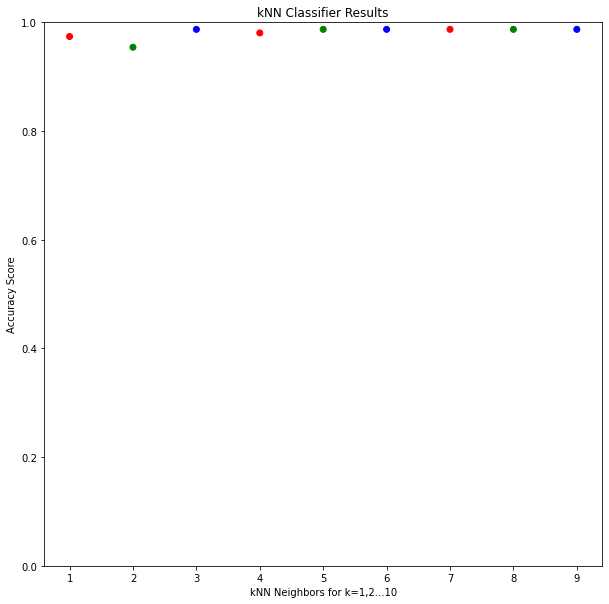

In [28]:
#array = np.array(data)
from sklearn.neighbors import KNeighborsClassifier

result = []
xlabel = []
color = []
colors = ['red', 'green', 'blue']
index = 0

for random_seed in range(1,2):
    #features = array[:, 5:]
    #labels = data.ix[:, 'class'].dropna()
    #test_size = 0.30
    
    train_d, test_d, train_l, test_l = x_train, x_test, y_train, y_test

    for neighbors in range(1,10):
        kNN = KNeighborsClassifier(n_neighbors=neighbors)
        kNN.fit(train_d, train_l)
        prediction = kNN.predict(test_d)
        xlabel.append(neighbors)
        result.append(accuracy_score(prediction, test_l))
        color.append(colors[index])
        index = (index+1)%3

plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...10')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 1)
plt.scatter(xlabel, result, color=color)
plt.savefig('10-folds kNN Result.png')
plt.show()

## LSTD

In [11]:
len(x_train)

12

In [233]:
conda install numpy=1.19

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - numpy=1.19


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    astropy-4.0.2              |   py38he774522_0         5.9 MB
    mkl-2020.2                 |              256       109.3 MB
    mkl-service-2.3.0          |   py38h196d8e1_0          47 KB
    mkl_fft-1.3.0              |   py38h46781fe_0         134 KB
    numexpr-2.7.3              |   py38hcbcaa1e_0         125 KB
    numpy-1.19.2               |   py38hadc3359_0          22 KB
    numpy-base-1.19.2          |   py38ha3acd2a_0         3.8 MB
    scipy-1.6.2                |   py38h14eb087_0        13.0 MB
    ------------------------------------------------------------
                 

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [9]:
from keras.layers.recurrent import LSTM

In [29]:
sequences = np.array(x_train)

# pad sequence
padded = pad_sequences(sequences)
X = np.expand_dims(padded, axis = 0)
print('Shape of X is ', X.shape) # (1, 3, 4)


Shape of X is  (1, 455, 12)


In [30]:
Y_train = np.array(y_train)
Y_train[Y_train == 'sample'] = float(1.0)  # equivalente a b.itemset((1, 1), -1)
Y_train[Y_train == 'surprised'] = float(2.0)

In [31]:
Y_train

array(['2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '1.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0', '2.0',
       '2.0', '2.0',

In [32]:
Y_train = Y_train.astype('float64')

In [33]:
y = Y_train.reshape(1,-1)
print('Shape of y is', y.shape) # (1, 3)

Shape of y is (1, 455)


In [43]:
Y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
y

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 

In [39]:
model = Sequential()
model.add(LSTM(12, return_sequences=False, input_shape=(None, X.shape[2])))
#model.add(LSTM(12, return_sequences=False), input_shape=(None, 4))
model.add(Dense(1, activation='sigmoid'))
#model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile (
    loss='mean_squared_error',
    optimizer=tf.keras.optimizers.Adam(0.1))
model.summary()
model.fit(x = X, y = y, batch_size=32, epochs=2)
#x_train, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 12)                1200      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 1,213
Trainable params: 1,213
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1/1 [==============================] - 0s 1ms/step - loss: 2.1885
Epoch 2/2
1/1 [==============================] - 0s 998us/step - loss: 1.7658


In [41]:
sequences = np.array(x_test)

# pad sequence
padded = pad_sequences(sequences)
X_test = np.expand_dims(padded, axis = 0)
print('Shape of X is ', X_test.shape) # (1, 3, 4)


Shape of X is  (1, 152, 12)


In [42]:
Y_test = np.array(y_test)
Y_test[Y_test == 'sample'] = float(1.0)  # equivalente a b.itemset((1, 1), -1)
Y_test[Y_test == 'surprised'] = float(2.0)
Y_test = Y_test.astype('float64')

In [19]:
Y_test

array([1., 1., 1., 1.])

In [43]:
Y_test = Y_test.reshape(1,-1)
print('Shape of y is', Y_test.shape) # (1, 3)

Shape of y is (1, 152)


In [44]:
y_pred = model.predict(X_test)
#print("AUC score", roc_auc_score(test["Approves"], y_pred))

In [46]:
y_pred

array([[0.95059466]], dtype=float32)

In [48]:
from keras.utils import to_categorical
train_Y_one_hot = to_categorical(Y_train)
test_Y_one_hot = to_categorical(Y_test)

In [49]:
train_Y_one_hot

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

In [50]:
Y_train

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [51]:
print("AUC score", roc_auc_score(Y_test, y_pred))

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

# Pytorch

In [218]:
conda install -c pytorch pytorch

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\amand\anaconda3

  added / updated specs:
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cudatoolkit-10.1.243       |       h74a9793_0       300.3 MB
    libuv-1.40.0               |       he774522_0         255 KB
    ninja-1.10.2               |       h6d14046_1         250 KB
    pytorch-1.8.1              |py3.8_cuda10.1_cudnn7_0       835.7 MB  pytorch
    ------------------------------------------------------------
                                           Total:        1.11 GB

The following NEW packages will be INSTALLED:

  cudatoolkit        pkgs/main/win-64::cudatoolkit-10.1.243-h74a9793_0
  libuv              pkgs/main/win-64::libuv-1.40.0-he774522_0
  ninja              pkgs/main/win-64::ninja-1.10.2

In [223]:
# torch
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.optim.lr_scheduler import ReduceLROnPlateau
# other
import pickle
import numpy as np
from sklearn.metrics import r2_score